In [263]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [264]:
def get_data_spam():
    data = pd.read_csv("datasets/spam.csv").values
    return data[:, 0:-1].astype('float64'), data[:, -1]

def get_data_cancer():
    data = pd.read_csv("datasets/cancer.csv").values
    return data[:, 1:].astype('float64'), data[:, 0]

In [265]:
def split_data(points, labels):
    points_train, points_test, labels_train, labels_test = train_test_split(points, labels, train_size=0.8)  
    return points_train, labels_train, points_test,  labels_test

In [266]:
def roc(labels, scores, l):
    x, y, _ = metrics.roc_curve(labels, scores, pos_label=l)
    plt.plot(x, y)
    plt.show()

In [267]:
def naive_bayesianClassifier_with_Gaussian_features(points_train, labels_train, points_test,  labels_test):
    unique_labels, counts = np.unique(labels_train, return_counts=True)
    p = counts / len(labels_train)
    m = []
    dev = []
    for label in unique_labels:
        xs = points_train[labels_train == label, :]
        m.append(np.mean(xs, axis=0))
        dev.append(np.std(xs, axis=0))
    m = np.array(m)
    dev = np.array(dev)
    res = np.empty((len(points_test), len(unique_labels))) 
    for label in range(len(unique_labels)):
        cur = np.empty(points_test.shape)
        for i in range(points_test.shape[0]):
            for j in range(points_test.shape[1]):
                cur[i][j] = norm.pdf(points_test[i][j], loc=m[label][j], scale=dev[label][j])
        res[:, label] = p[label] * np.prod(cur, axis=1) 
    for i in range(len(res)):
        s = np.sum(res[i])
        res[i] = 0.5 if s == 0 else res[i] / s   
    print(np.mean(labels_test == unique_labels[np.argmax(res, axis=1)]))
    return res

0.9824561403508771


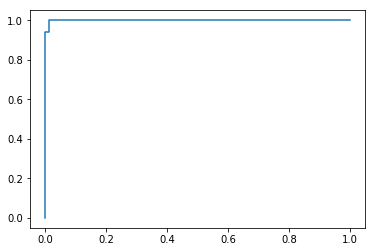

In [268]:
points, labels = get_data_cancer()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
scores = naive_bayesianClassifier_with_Gaussian_features(points_train, labels_train, points_test,  labels_test)
roc(labels_test, scores[:, 1], 'M')

0.8078175895765473


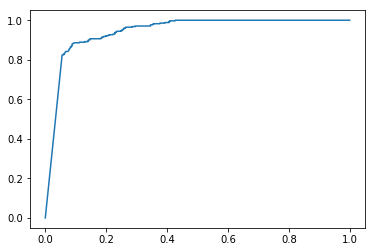

In [269]:
points, labels = get_data_spam()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
scores = naive_bayesianClassifier_with_Gaussian_features(points_train, labels_train, points_test,  labels_test)
roc(labels_test, scores[:, 1], 1)